# Linear Regression Bike Sharing Assignment

- This assignment is a programming assignment where in you have to build a multiple linear regression model for the prediction of demand for shared bikes. 

###  Problem Statement:

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these share bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

  ## The company wants to know:
  

-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

### we need do:

- Create a linear model that describe the effect of various features on price.
- The model should be interpretable so that the management can understand it.

# TASK:1
# Reading and Understanding the Data

In [1]:
#Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all  libaries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [3]:
# Reading the csv_file 
df_Rent_Data= pd.read_csv(r"C:\Users\PRABHAKAR AANNA\Downloads\days\day.csv")
df_Rent_Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspect the various aspects of the "Bike sharing" dataframe

In [4]:
# print the shape of the data frame.
df_Rent_Data.shape

(730, 16)

In [5]:
# print the information of variables to check their data types.
df_Rent_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# describe of the data frame.
df_Rent_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Quality Check and Missing values

In [7]:
# finding the null values sum in all the columns
column_wise_null=df_Rent_Data.isnull().sum(axis=0)
column_wise_null

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
row_wise_null=df_Rent_Data.isnull().sum(axis=1)
row_wise_null

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

### Identify the categorical and continuous features.
### Drop the unnecessary variables: ‘instant’, ‘dteday’, ‘casual’ and ‘registered’.
### Check the data-type of all the columns and make necessary changes if required.


In [9]:
# Drop the unnecessary variables: ‘instant’, ‘dteday’, ‘casual’ and ‘registered’.
df_Rent_Data=df_Rent_Data.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1)
# inspecting the shape of data set
df_Rent_Data.shape

(730, 11)

# Task 2:
# Data Visualisation¶
- Perform EDA to understand various variables
- Check the correlation between the variables

In [10]:
# maping of variables 
lis0=["season"]
df_Rent_Data[lis0]=df_Rent_Data[lis0].apply(lambda x:x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
lis1 = ['mnth']
df_Rent_Data[lis1]=df_Rent_Data[lis1].apply(lambda x:x.map({1:"Jan.",2:"Feb.",3:"Mar.",4:"Apr.",5: "May",
                                         6:"Jun.",7:"Jul.",8:"Aug.",9:"Sept.",10:"Oct.",
                                        11: "Nov.",12:"Dec."}))
lis2 = ['weathersit']
df_Rent_Data[lis2] = df_Rent_Data[lis2].apply(lambda x:x.map({1:'Clear',2:"Mist + Cloudy",3:"Light_Snow",4:"Heavy_Rain"}))
lis3 = ['weekday']
df_Rent_Data[lis3] = df_Rent_Data[lis3].apply(lambda x:x.map({0:"Sun.",1:"Mon.",2:"Tue.",3:"Wed.",4:"Thu.",5:"Fri.",6:"Sat."}))


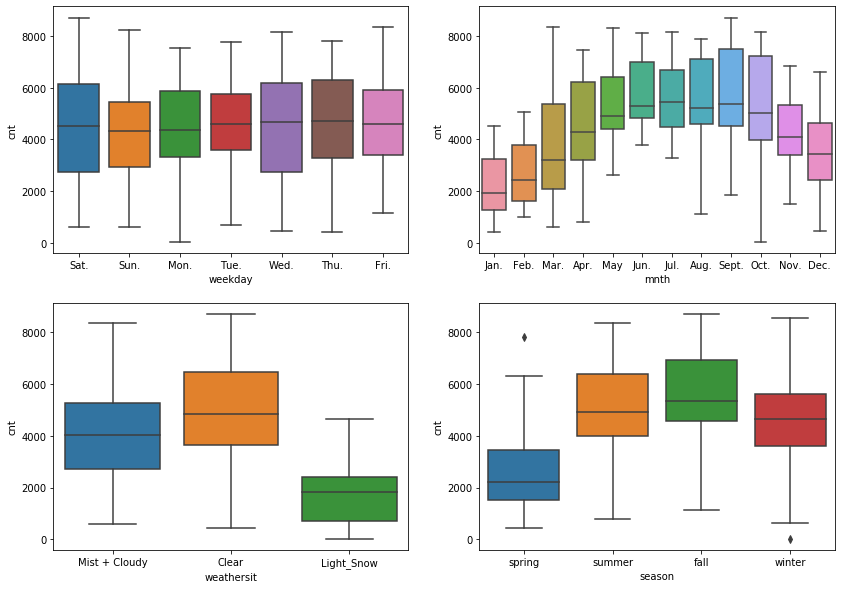

In [11]:
# visualization of Categorical variables
plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_Rent_Data)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_Rent_Data)
plt.subplot(2,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_Rent_Data)
plt.subplot(2,2,4)
sns.boxplot(x = 'season', y = 'cnt', data = df_Rent_Data)
plt.show()

In [12]:
# Check the correlation between the variables
df_corr = df_Rent_Data.corr().round(2)
df_corr

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.00,0.01,-0.00,0.05,-0.11,-0.01,0.57
holiday,0.01,1.00,-0.25,-0.03,-0.02,0.01,-0.07
workingday,-0.00,-0.25,1.00,0.05,0.02,-0.02,0.06
temp,0.05,-0.03,0.05,1.00,0.13,-0.16,0.63
hum,-0.11,-0.02,0.02,0.13,1.00,-0.25,-0.10
windspeed,-0.01,0.01,-0.02,-0.16,-0.25,1.00,-0.24
cnt,0.57,-0.07,0.06,0.63,-0.10,-0.24,1.00


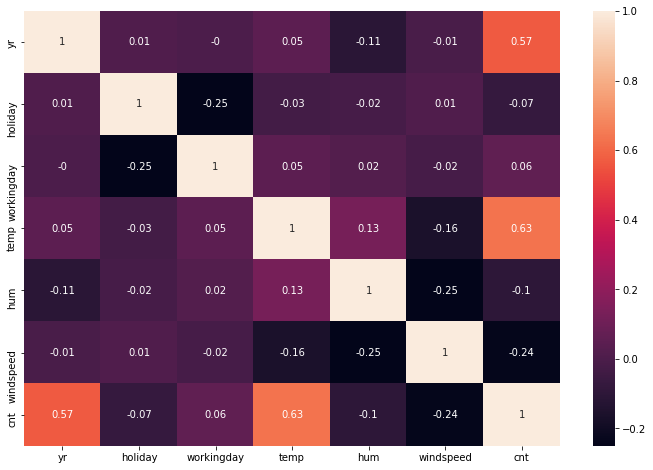

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot = True)
plt.show()

In [14]:
# # correlation between variables are shown in Heat Map
# plt.figure(figsize = (8,6))
# ax = sns.heatmap(df_corr,annot = True, cmap = "YlGnBu")
# bottom,top = ax.get_ylim() # setting the limit of y axis
# ax.set_ylim(bottom + 0.5,top - 0.5)
# plt.show()

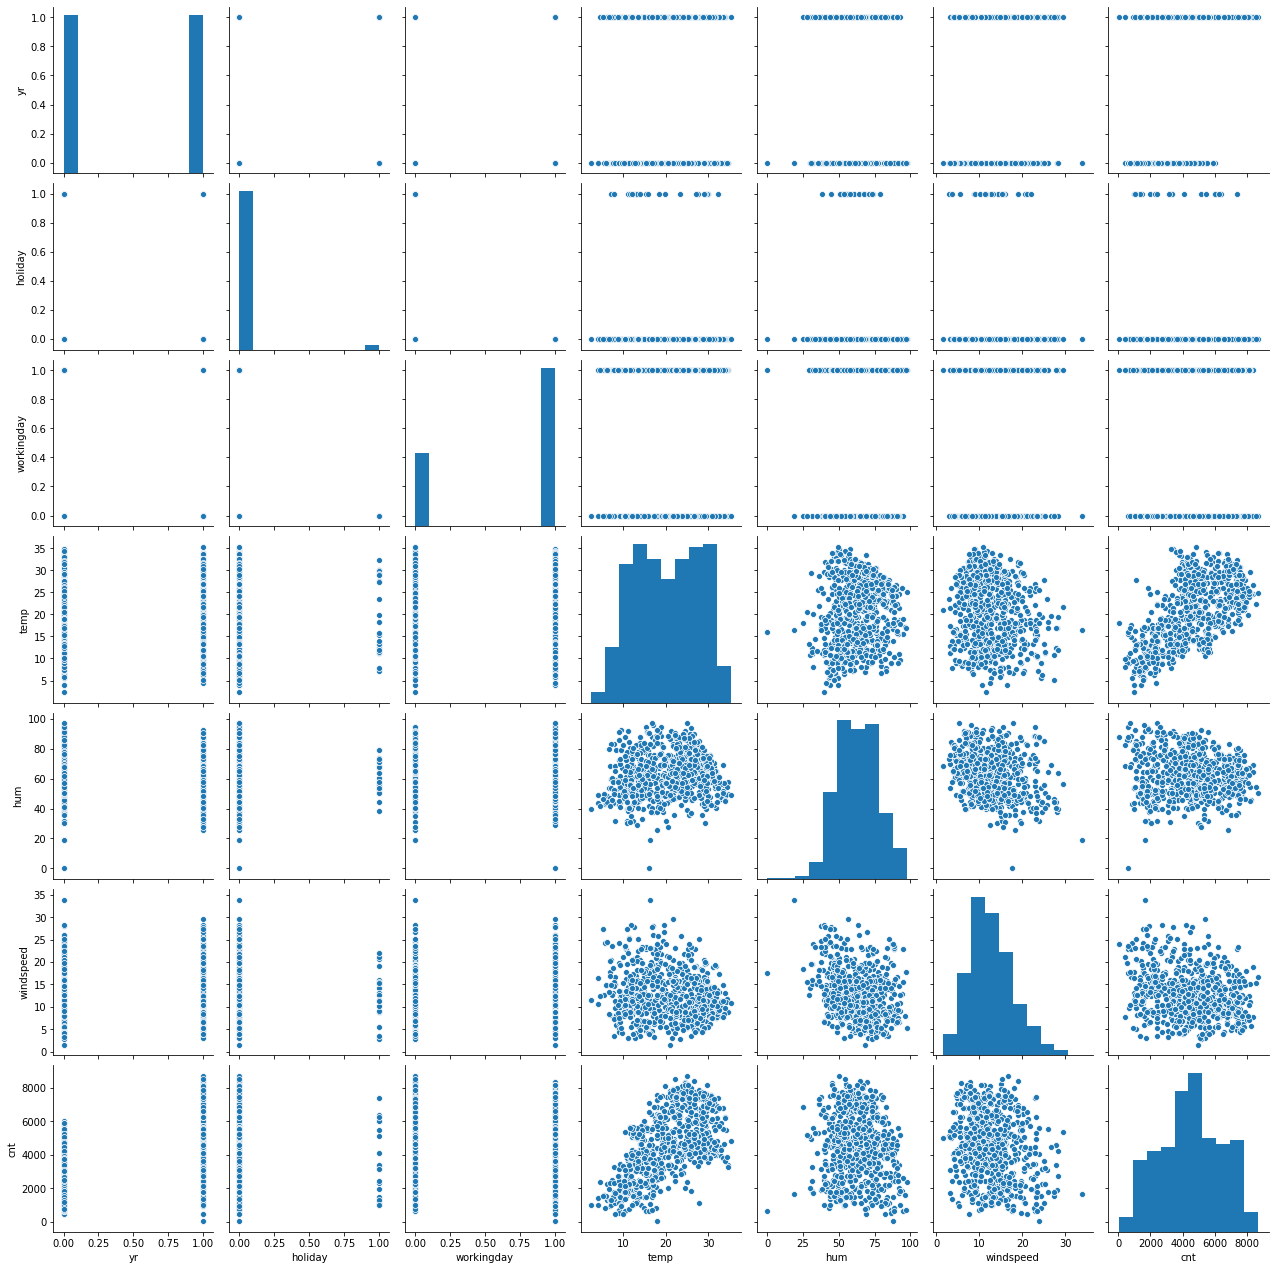

In [15]:
sns.pairplot(df_Rent_Data)
plt.show()

In [16]:
# Create dummy variables for all the categorical features
df_dummy = pd.get_dummies(df_Rent_Data[['season','mnth','weekday','weathersit']],drop_first=True)
df_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug.,mnth_Dec.,mnth_Feb.,mnth_Jan.,mnth_Jul.,mnth_Jun.,mnth_Mar.,...,mnth_Oct.,mnth_Sept.,weekday_Mon.,weekday_Sat.,weekday_Sun.,weekday_Thu.,weekday_Tue.,weekday_Wed.,weathersit_Light_Snow,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# Concatinate the dataframe of Rent Data with df_dummy and dropping the respective columns from which dummies created 
df_Rent_Data=pd.concat([df_Rent_Data,df_dummy], axis=1)
columns2 = ['season','mnth','weekday','weathersit']
df_Rent_Data = df_Rent_Data.drop(columns2,axis = 1)



In [18]:
# Inspect the dataframe after dropping the categorical columns which are used to create dummies
df_Rent_Data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct.,mnth_Sept.,weekday_Mon.,weekday_Sat.,weekday_Sun.,weekday_Thu.,weekday_Tue.,weekday_Wed.,weathersit_Light_Snow,weathersit_Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# TASK : 3
# Data Preparation
- Create dummy variables for all the categorical features.
- Divide the data to train and test.
- Perform scaling.
- Divide the data into X and y

### Splitting the Data into Training and Testing Set

In [19]:
# Divide the data set into two: Train Data set and Test Data set
df_train,df_test= train_test_split(df_Rent_Data, train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape) # shape of the train data
print(df_test.shape)

(510, 29)
(219, 29)


# Rescaling the Features
- We will use MinMax scaling.

In [20]:
# Instantiate an object
scaler=MinMaxScaler()

# list of numaric variables
num_vars=["temp","hum","windspeed",'cnt']

# Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()  # checking the variables (scaling)

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


# # Dividing into X and Y sets for the model building

In [21]:
# Divide the data into X_train and y_train
y_train = df_train.pop('cnt') # Y train
X_train = df_train # X Train

In [22]:
# Multilinear Regression using RFE and Manual
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15) # running RFE
rfe = rfe.fit(X_train,y_train)

# columns selected using RFE and displaying the columns along with rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug.', False, 7),
 ('mnth_Dec.', False, 4),
 ('mnth_Feb.', False, 5),
 ('mnth_Jan.', False, 2),
 ('mnth_Jul.', True, 1),
 ('mnth_Jun.', False, 13),
 ('mnth_Mar.', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov.', False, 3),
 ('mnth_Oct.', False, 10),
 ('mnth_Sept.', True, 1),
 ('weekday_Mon.', False, 8),
 ('weekday_Sat.', True, 1),
 ('weekday_Sun.', True, 1),
 ('weekday_Thu.', False, 11),
 ('weekday_Tue.', False, 9),
 ('weekday_Wed.', False, 12),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [23]:
# collecting top 15 columns as ranked by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul.',
       'mnth_Sept.', 'weekday_Sat.', 'weekday_Sun.', 'weathersit_Light_Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [24]:
# not needed columns
X_train.columns[~rfe.support_]

Index(['mnth_Aug.', 'mnth_Dec.', 'mnth_Feb.', 'mnth_Jan.', 'mnth_Jun.',
       'mnth_Mar.', 'mnth_May', 'mnth_Nov.', 'mnth_Oct.', 'weekday_Mon.',
       'weekday_Thu.', 'weekday_Tue.', 'weekday_Wed.'],
      dtype='object')

# Building model using statsmodel

In [25]:
# creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [26]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        20:46:20   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Checking VIF

In [27]:
# Variance Inflation factor (VIF) for the X_train Data set
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_Sat.,12.20
12,weekday_Sun.,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
14,weathersit_Mist + Cloudy,1.57


In [28]:
# Dropping highly correlated variables and insignificant variables
x1 = X_train_rfe.drop('workingday',axis=1)

In [29]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(x1)

# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        20:46:21   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [30]:
# again Variance Inflation factor (VIF)  Data set
vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['VIF']= [variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.06
4,windspeed,4.68
5,season_spring,4.03
7,season_winter,3.37
6,season_summer,2.78
13,weathersit_Mist + Cloudy,2.30
0,yr,2.08
8,mnth_Jul.,1.59
9,mnth_Sept.,1.39


In [31]:
# Dropping highly "p value 0.371" "  insignificant variables
x2 = x1.drop('weekday_Sat.',axis=1)

In [32]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(x2)

# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-192
Time:                        20:46:21   Log-Likelihood:                 517.45
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [33]:
# again Variance Inflation factor (VIF)  Data set
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF']= [variance_inflation_factor(x2.values,i)for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.03
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.35
6,season_summer,2.78
12,weathersit_Mist + Cloudy,2.30
0,yr,2.08
8,mnth_Jul.,1.59
9,mnth_Sept.,1.39


In [34]:
#  again Dropping highly correlated variables and insignificant variables
x3 = x2.drop('hum',axis=1)

In [35]:
# again Variance Inflation factor (VIF)  Data set
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF']= [variance_inflation_factor(x3.values,i)for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,season_summer,2.22
4,season_spring,2.11
0,yr,2.07
6,season_winter,1.82
7,mnth_Jul.,1.59
11,weathersit_Mist + Cloudy,1.55
8,mnth_Sept.,1.34
9,weekday_Sun.,1.18


In [36]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(x3)

# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.45e-190
Time:                        20:46:21   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [37]:
#  again Dropping highly correlated variables and insignificant variables
x4 = x3.drop('temp',axis=1)

In [38]:
# again Variance Inflation factor (VIF)  Data set
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF']= [variance_inflation_factor(x4.values,i)for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.82
3,season_spring,2.09
4,season_summer,2.02
0,yr,1.83
5,season_winter,1.78
10,weathersit_Mist + Cloudy,1.51
6,mnth_Jul.,1.21
8,weekday_Sun.,1.17
7,mnth_Sept.,1.16
9,weathersit_Light_Snow,1.08


In [39]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(x4)

# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.32e-151
Time:                        20:46:22   Log-Likelihood:                 412.51
No. Observations:                 510   AIC:                            -801.0
Df Residuals:                     498   BIC:                            -750.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
# Dropping highly "p value 0.642" "  insignificant variables
x5 = x4.drop('mnth_Jul.',axis=1)

In [41]:
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF']= [variance_inflation_factor(x5.values,i)for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.49
3,season_spring,1.92
4,season_summer,1.86
0,yr,1.78
5,season_winter,1.66
9,weathersit_Mist + Cloudy,1.51
7,weekday_Sun.,1.16
6,mnth_Sept.,1.14
8,weathersit_Light_Snow,1.08
1,holiday,1.05


In [42]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(x5)

# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.84e-152
Time:                        20:46:22   Log-Likelihood:                 412.40
No. Observations:                 510   AIC:                            -802.8
Df Residuals:                     499   BIC:                            -756.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# Residual Analysis of the train data

In [43]:
y_train_pred = lm.predict(X_train_rfe1)

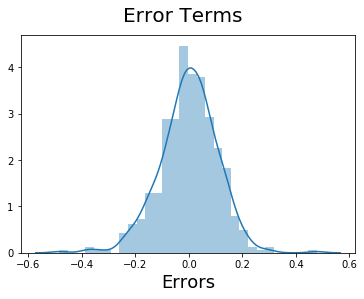

In [44]:
# calculate the residual and ploting the distribution curve 
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel("Errors",fontsize = 18)
plt.show()

# Making Predictions Using the Final Model

In [45]:
# list of numaric variables
num_vars=["temp","hum","windspeed",'cnt']

# transform 
df_test[num_vars]=scaler.transform(df_test[num_vars])

# checking the variables after transforming data using train data set 
df_test[num_vars].describe() 

,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592
std,0.233698,0.148974,0.159947,0.218435
min,0.046591,0.261915,-0.042808,0.048205
25%,0.354650,0.527265,0.198517,0.377531
50%,0.558691,0.627737,0.299459,0.524275
75%,0.759096,0.743928,0.403048,0.672745
max,0.984424,1.002146,0.807474,0.963300


In [46]:
# Divide the test data set into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [47]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[x5.columns]
# Adding Constant
X_test_new = sm.add_constant(X_test_new)

In [48]:
# Making Predictions
y_pred_test = lm.predict(X_test_new) # predicting test data using train data

Text(0, 0.5, 'y_pred')

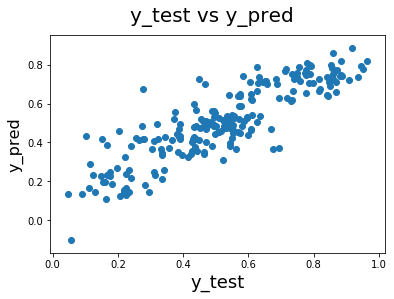

In [49]:
# plotting y_test  and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)

In [50]:
# evaluate the R2 for test data
r2_score(y_true = y_test ,y_pred = y_pred_test).round(3)

0.749

#### The following can be observed from the above analysis:
- ### The R2 of test data is `0.`749 or `74.9 %` 
- ### The difference between R2 of train data and R2 of test data is `2 %`
- ### The data is well trained and best fitted as the difference between R2 of both the data set is less than `5 %`

# The following equation is the best fitted line:
- cnt = 0.5870 + 0.247(yr) -0.1087(holiday )-0.1704(windspeed) -0.2951(season_spring) - -0.0415(season_summer) -0.0715(season_winter) -0.0715(mnth_sept.)-0.0492 (weekday_Sun.) - 0.3024(weathersit_Light_Snow) - 0.0926(weathersit_Mist_Cloudy)